<a href="https://colab.research.google.com/github/Gangadaar/Datascience_Journey/blob/main/Pokemen_Decsion_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing requierid Lib

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score,confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt



Exploratory Data Analysis - EDA
Basics
Head, info, null, fillna and others

In [2]:
nic=pd.read_csv('/content/Pokemon (2).csv')
nic.head()


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [3]:
nic.shape


(800, 13)

In [4]:
nic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [5]:
nic["Legendary"] = nic["Legendary"].astype(int)

In [6]:
nic.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375,0.08125
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129,0.27339
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000,0.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000,0.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000,0.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000,0.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000,1.00000


In [7]:
nic.shape

(800, 13)

In [ ]:
Boxplot to understand the outliers 

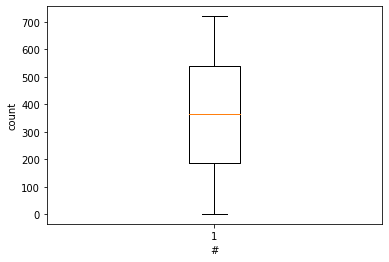

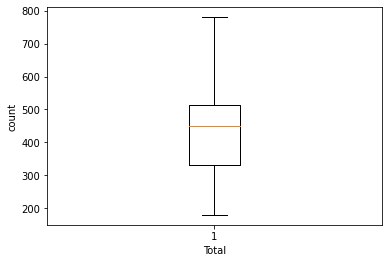

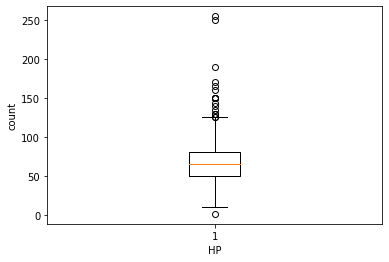

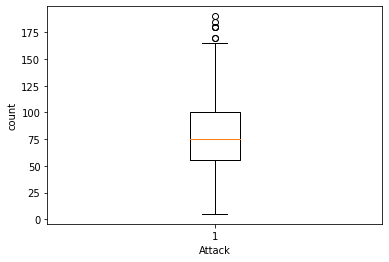

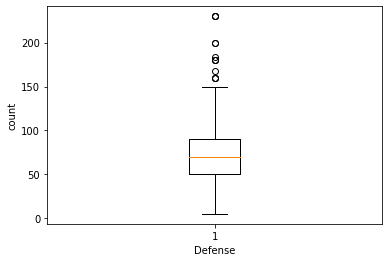

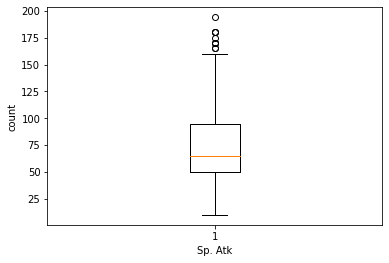

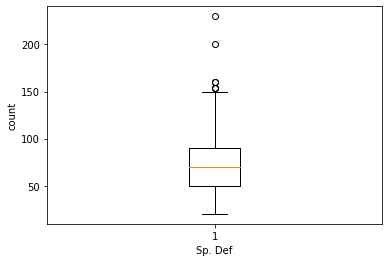

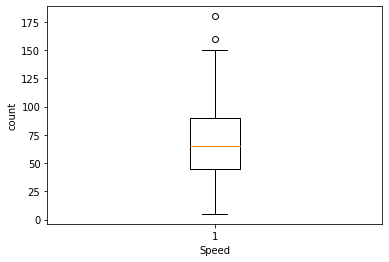

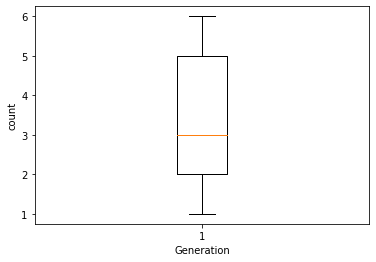

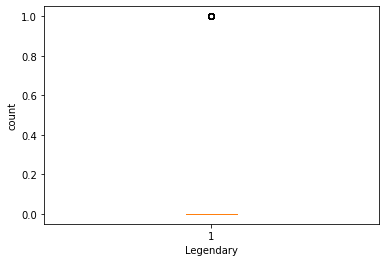

In [8]:
col_list = list(nic.columns)
for i in col_list:
  if(nic[i].dtypes=='int64'):
    plt.boxplot(nic[i])
    plt.xlabel(i)
    plt.ylabel('count')
    plt.show()


In [9]:
nic.rename(columns = {'Sp. Atk':'Sp_Atk','Sp. Def':'Sp_Def'}, inplace = True)

Removing outliers - IQR score -

In [10]:
Q3 = nic.HP.quantile(0.75)
Q1 = nic.HP.quantile(0.25)
IQR = Q3-Q1
df = nic[(nic.HP >= Q1-1.5*IQR) & (nic.HP <= Q3+1.5*IQR)]

Q3 = nic.Attack.quantile(0.75)
Q1 = nic.Attack.quantile(0.25)
IQR = Q3-Q1
df = nic[(nic.Attack >= Q1-1.5*IQR) & (nic.Attack<= Q3+1.5*IQR)]

Q3 = nic.Defense.quantile(0.75)
Q1 = nic.Defense.quantile(0.25)
IQR = Q3-Q1
df = nic[(nic.Defense >= Q1-1.5*IQR) & (nic.Defense <= Q3+1.5*IQR)]

Q3 = nic.Sp_Atk.quantile(0.75)
Q1 = nic.Sp_Atk.quantile(0.25)
IQR = Q3-Q1
df = nic[(nic.Sp_Atk >= Q1-1.5*IQR) & (nic.Sp_Atk <= Q3+1.5*IQR)]

Q3 = nic.Sp_Def.quantile(0.75)
Q1 = nic.Sp_Def.quantile(0.25)
IQR = Q3-Q1
df = nic[(nic.Sp_Def >= Q1-1.5*IQR) & (nic.Sp_Def <= Q3+1.5*IQR)]

Q3 = nic.Speed.quantile(0.75)
Q1 = nic.Speed.quantile(0.25)
IQR = Q3-Q1
df = nic[(nic.Speed >= Q1-1.5*IQR) & (nic.Speed <= Q3+1.5*IQR)]

Q3 = nic.Generation.quantile(0.75)
Q1 = nic.Generation.quantile(0.25)
IQR = Q3-Q1
df = nic[(nic.Generation >= Q1-1.5*IQR) & (nic.Generation <= Q3+1.5*IQR)]

In [11]:
nic.shape

(800, 13)

In [12]:
nic.isnull().sum()

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp_Atk          0
Sp_Def          0
Speed           0
Generation      0
Legendary       0
dtype: int64

List creation 

In [13]:
col_list = list(nic.columns)

In [14]:
for col in col_list:
    if nic[col].dtypes=='object':
        nic[col] = nic[col].fillna(nic[col].mode()[0])
    else:
        nic[col] = nic[col].fillna(nic[col].mean())

In [15]:
col_list = []
for col in nic.columns:
    if ((nic[col].dtype == 'object') & (col != 'Legendary') ):
        col_list.append(col)

In [16]:
nic.isnull().sum()

#             0
Name          0
Type 1        0
Type 2        0
Total         0
HP            0
Attack        0
Defense       0
Sp_Atk        0
Sp_Def        0
Speed         0
Generation    0
Legendary     0
dtype: int64

Check for duplicates 

In [17]:
nic.duplicated().sum()

0

Check for correlation 

In [18]:
nic.corr()

,#,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,Legendary
#,1.000000,0.119813,0.097614,0.102298,0.094786,0.088759,0.085817,0.010733,0.982516,0.153396
Total,0.119813,1.000000,0.618748,0.736211,0.612787,0.747250,0.717609,0.575943,0.048384,0.501758
HP,0.097614,0.618748,1.000000,0.422386,0.239622,0.362380,0.378718,0.175952,0.058683,0.273620
Attack,0.102298,0.736211,0.422386,1.000000,0.438687,0.396362,0.263990,0.381240,0.051451,0.345408
Defense,0.094786,0.612787,0.239622,0.438687,1.000000,0.223549,0.510747,0.015227,0.042419,0.246377
Sp_Atk,0.088759,0.747250,0.362380,0.396362,0.223549,1.000000,0.506121,0.473018,0.036437,0.448907
Sp_Def,0.085817,0.717609,0.378718,0.263990,0.510747,0.506121,1.000000,0.259133,0.028486,0.363937
Speed,0.010733,0.575943,0.175952,0.381240,0.015227,0.473018,0.259133,1.000000,-0.023121,0.326715
Generation,0.982516,0.048384,0.058683,0.051451,0.042419,0.036437,0.028486,-0.023121,1.000000,0.079794
Legendary,0.153396,0.501758,0.273620,0.345408,0.246377,0.448907,0.363937,0.326715,0.079794,1.000000


In [19]:
nic.columns


Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp_Atk', 'Sp_Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

In [20]:

nic.max()


#                          721
Name          Zygarde50% Forme
Type 1                   Water
Type 2                   Water
Total                      780
HP                         255
Attack                     190
Defense                    230
Sp_Atk                     194
Sp_Def                     230
Speed                      180
Generation                   6
Legendary                    1
dtype: object

In [49]:
#checking for the generation 5 pokeman
nic[nic['Generation']==5].shape

(165, 13)

check for highest dense pokemon

In [51]:
#nic_1['def']=pd.DataFrame (nic(['Defense']+['Sp.Def']))
#df_combined = pd.concat([nic,nic_1], axis=1)
#df_combined

nic_def=nic[nic['Defense']==230]
nic_def



,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,Legendary
224,208,SteelixMega Steelix,Steel,Ground,610,75,125,230,55,95,30,2,0
230,213,Shuckle,Bug,Rock,505,20,10,230,10,230,5,2,0
333,306,AggronMega Aggron,Steel,Flying,630,70,140,230,60,80,50,3,0


correlation heatmap 

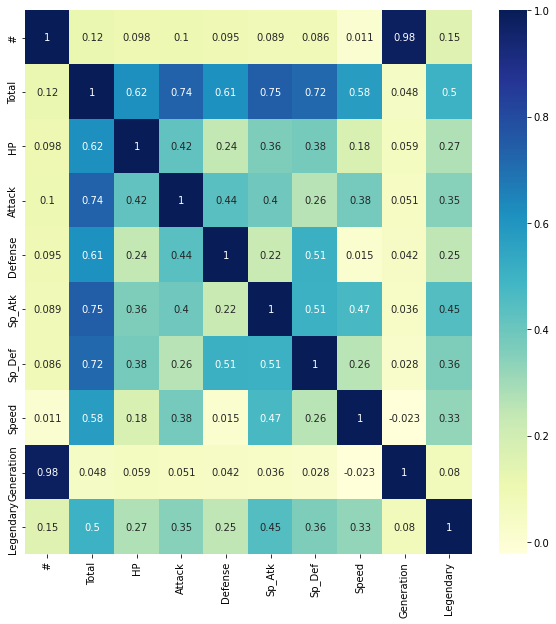

In [23]:
plt.figure(figsize=(10,10))
sns.heatmap(nic.corr(),annot=True, cmap="YlGnBu")

## **Training the model **

**Handle the missing values.**

VIF to remove multicollinarity 

In [52]:

from statsmodels.stats.outliers_influence import variance_inflation_factor 
col_list = []
for col in nic.columns:
    if ((nic[col].dtype != 'object') & (col != 'Legendary') & (col != '#')):
        col_list.append(col)

X =nic[col_list]
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 
print(vif_data)


      feature       VIF
0       Total       inf
1          HP       inf
2      Attack       inf
3     Defense       inf
4      Sp_Atk       inf
5      Sp_Def       inf
6       Speed       inf
7  Generation  4.131356


/usr/local/lib/python3.7/dist-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Labeling X and Y for analysis

In [53]:
x = df.loc[:,['HP','Attack','Defense','Sp_Atk','Sp_Def','Speed']]
y=nic['Legendary']

x_train,x_test,y_train,y_test=train_test_split(x,y, random_state=1,test_size=0.3)

Linear regression 


In [54]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)



LinearRegression()

In [55]:
y_pred=lr.predict(x_test)


In [56]:
from sklearn.metrics import r2_score

In [57]:
r2_score(y_test,y_pred)

0.2432849909413275

Logistic regression 

In [58]:
x = df.loc[:,['HP','Attack','Defense','Sp_Atk','Sp_Def','Speed']]
y=nic['Legendary']
x_train,x_test,y_train,y_test=train_test_split(x,y, random_state=1,test_size=0.3)

In [59]:
#from sklearn.preprocessing import StandardScaler

#SC=StandardScaler()
#x_train=SC.fit_transform(x_train)
#x_test=SC.transform(x_test)


In [60]:
from sklearn.linear_model import LogisticRegression



In [61]:
logisticRegr= LogisticRegression()

In [62]:
logisticRegr.fit(x_train,y_train)

LogisticRegression()

In [63]:
g_pred=logisticRegr.predict(x_test)

In [64]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,g_pred)

0.925

Descion tree

In [65]:
clf = tree.DecisionTreeClassifier() 
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [66]:
y_train_pred = clf.predict(x_train)
y_test_pred = clf.predict(x_test)



In [67]:
print(f'Train score {accuracy_score(y_train_pred,y_train)}')
print(f'Test score {accuracy_score(y_test_pred,y_test)}')

Train score 1.0
Test score 0.9125


In [68]:
accuracy_score(y_test_pred,y_test)

0.9125

Creation of confusion matrix 

In [69]:
def plot_confusionmatrix(predict,actual,label):
    print(f'{label} Confusion matrix')
    cf = confusion_matrix(predict,actual)
    sns.heatmap(cf,annot=True,fmt='G' )

   
   

 Confusion matrix


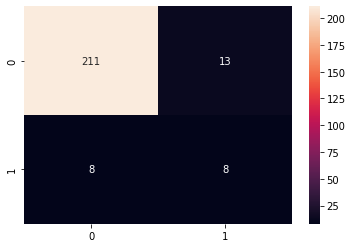

In [70]:
plot_confusionmatrix(y_test_pred,y_test,"")

In [71]:
import sklearn.metrics as metrics
print(metrics.classification_report(y_test_pred, y_test,))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95       224
           1       0.38      0.50      0.43        16

    accuracy                           0.91       240
   macro avg       0.67      0.72      0.69       240
weighted avg       0.92      0.91      0.92       240



In [72]:
c_parameter_values = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
df1 = pd.DataFrame(columns=['max_depth', 'accuracy'])
df1

,max_depth,accuracy


In [73]:
for input_parameter in c_parameter_values:
    model = tree.DecisionTreeClassifier(max_depth=input_parameter)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    acc_score = accuracy_score(y_test,y_pred)*100
    df1= df1.append({'max_depth' : input_parameter , 'accuracy' : acc_score}, ignore_index=True) 
df1

,max_depth,accuracy
0,1.0,91.250000
1,2.0,92.916667
2,3.0,92.500000
3,4.0,90.833333
4,5.0,89.166667
5,6.0,90.833333
6,7.0,91.250000
7,8.0,91.250000
8,9.0,90.416667
9,10.0,90.833333


In [74]:
model = tree.DecisionTreeClassifier(max_depth=2)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
acc_score = accuracy_score(y_test,y_pred)*100

Accuracy score is best fit in 92.91

In [75]:
acc_score

92.91666666666667

In [76]:
import sklearn.metrics as metrics
print(metrics.classification_report(y_test_pred, y_test,))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95       224
           1       0.38      0.50      0.43        16

    accuracy                           0.91       240
   macro avg       0.67      0.72      0.69       240
weighted avg       0.92      0.91      0.92       240

